<a href="https://colab.research.google.com/github/amelrnt/Machine_Learning_Project/blob/main/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [ ]:
# import libraries
try:
  %tensorflow_version
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

print(tf.__version__)

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-10-01 06:14:29--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.1s    

2021-10-01 06:14:29 (2.48 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2021-10-01 06:14:29--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [ ]:
df_train = pd.read_csv(train_file_path, sep='\t', names=['status', 'text'], encoding ="latin-1")
df_test = pd.read_csv(test_file_path, sep='\t', names=['status', 'text'], encoding ="latin-1")

In [ ]:
# ham = 0, spam = 1
label_encoder = LabelEncoder()
label_encoder.fit(df_train['status'])
label_values = label_encoder.transform(df_train['status'])
df_train['status'] = label_values

label_encoder = LabelEncoder()
label_encoder.fit(df_test['status'])
label_values = label_encoder.transform(df_test['status'])
df_test['status'] = label_values

In [ ]:
df_train

,status,text
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day Ã¼...
...,...,...
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...
4176,1,free entry into our Â£250 weekly competition j...
4177,1,-pls stop bootydelious (32/f) is inviting you ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


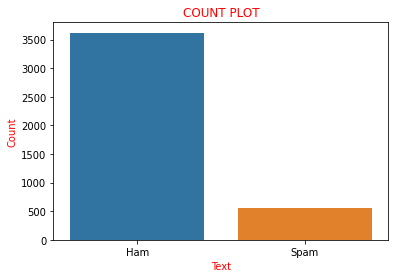

In [ ]:
import seaborn as sns   
sns.countplot(df_train['status'])
plt.xlabel('Text', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1],['Ham','Spam'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [ ]:
df_train_ham = df_train[df_train.status == 1]
df_train_spam = df_train[df_train.status == 0]

data on ham text


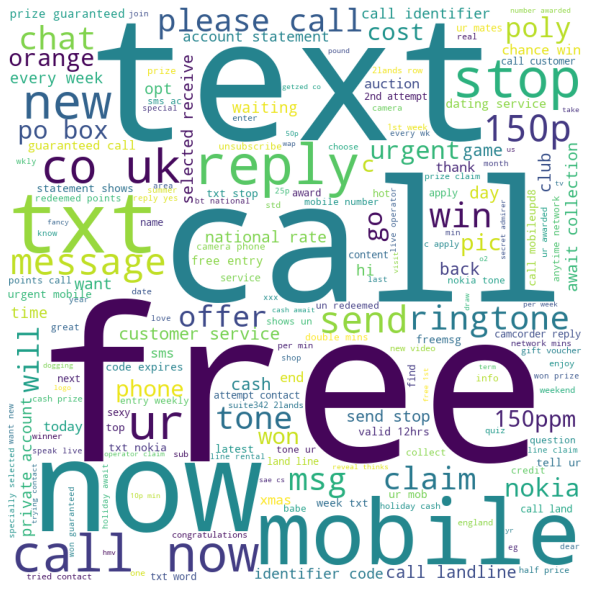

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_train_ham.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wc_train = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc_train)
plt.axis("off")
plt.tight_layout(pad = 0)
 
print("data on ham text")  
plt.show()

data on spam text


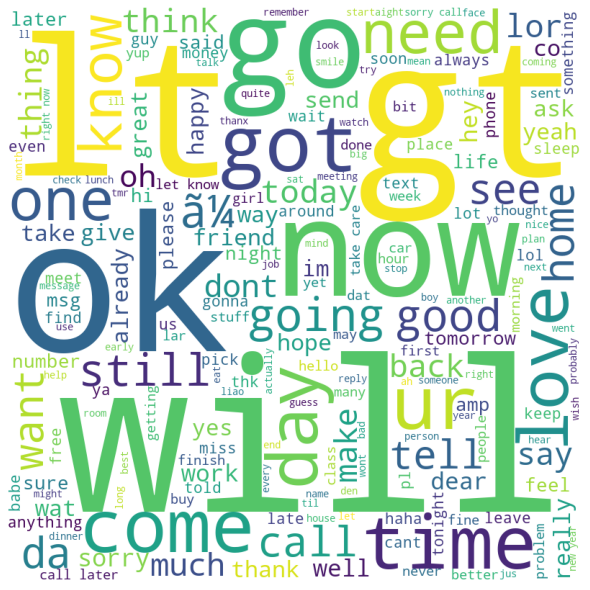

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_train_spam.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wc_test = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc_test)
plt.axis("off")
plt.tight_layout(pad = 0)
 
print("data on spam text") 
plt.show()


Cleaning data Process

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer, ToktokTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
import unicodedata
import string
import spacy
nltk.download('words')

In [ ]:
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

remove_accented_chars('Sómě Áccěntěd těxt. Some words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.')    

'Some Accented text. Some words such as resume, cafe, protest, divorce, coordinate, expose, latte.'

In [ ]:
# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 
# call function
remove_numbers("007 Not sure@ if this % was #fun! 558923 What do# you think** of it.? $500USD!")

' Not sure if this  was fun!  What do you think of it.? USD!'

In [ ]:
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text# call function
remove_punctuation('Article: @First sentence of some, {important} article having lot of ~ punctuations. And another one;!')

'Article First sentence of some important article having lot of  punctuations And another one'

In [ ]:
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
# custom: removing words from list
stopword_list.remove('not')# function to remove stopwords
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text# call function
remove_stopwords("i am myself you the stopwords list and this article is not should removed")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'stopwords list article not removed'

In [ ]:
# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()# call function
remove_extra_whitespace_tabs('  This web line  has \t some extra  \t   tabs and whitespaces  ')

'This web line has some extra tabs and whitespaces'

In [ ]:
# function to remove special characters
def to_lowercase(text):
    return text.lower()# call function
to_lowercase('ConVert THIS string to LOWER cASe.')

'convert this string to lower case.'

In [ ]:
nlp = spacy.load('en',parse=True,tag=True, entity=True)# function to remove special characters
def get_lem(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text# call function
get_lem("we are eating and swimming ; we have been eating and swimming ; he eats and swims ; he ate and swam ")

'we be eat and swim ; we have be eat and swim ; he eat and swim ; he eat and swam'

In [ ]:
words = set(nltk.corpus.words.words())
def remove_non_eng(text):
  text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
  return text

sent = "Io andiamo to the beach with my amico."
remove_non_eng(sent)
# 'Io to the beach with my'

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


'Io to the beach with my .'

gotta loop throught element and re assign

In [ ]:
def cleaning_single_text(text):
  text = text.replace("'", "\\\'")
  text = text.replace('"', "'")
  text = to_lowercase(text)
  text = remove_extra_whitespace_tabs(text)
  text = remove_stopwords(text)
  text = remove_punctuation(text)
  text = remove_numbers(text)
  text = remove_accented_chars(text)
  text = remove_non_eng(text)
  text = get_lem(text)
  return text

In [ ]:
for i in range(len(df_train)):
    df_train.loc[i, "text"] = cleaning_single_text(df_train.text[i])

In [ ]:
df_train

,text
0,wake bad dream u tho not like u right not know...
1,never nothing
2,u sound like scouse boy like travel da bus u r...
3,mum say wan go go shun watch da glass exhibition
4,never lei v lazy get wat day send da not work one
...,...
4174,woke late fall asleep til
4175,u reckon need arrange transport u thank
4176,free entry weekly competition text word win
4177,stop f invite friend reply yes see stop send stop


clean text to learn


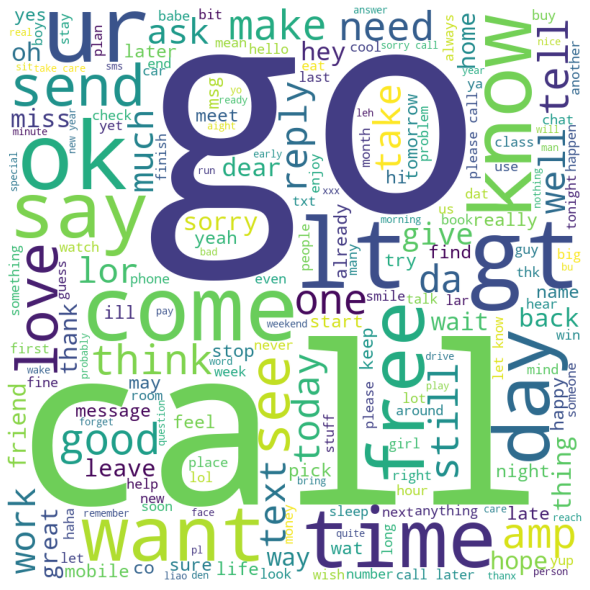

In [ ]:
comment_words = ''
# iterate through the csv file
for val in df_train.text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wc_test = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc_test)
plt.axis("off")
plt.tight_layout(pad = 0)
 
print("clean text to learn") 
plt.show()

Choosen algorithm : TfidfVectorizer + Naive Bayes Algorithm 

In [ ]:
x_train = df_train
y_train = x_train.pop('status')
x_test = df_test
y_test = x_test.pop('status')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
features_train = vectorizer.fit_transform(x_train.text)
features_test = vectorizer.transform(x_test.text)

In [ ]:
print(vectorizer.get_feature_names())
print(features_train.shape)

['aa', 'abbey', 'ability', 'able', 'abnormally', 'abroad', 'absolutely', 'abuse', 'abuser', 'academic', 'accent', 'accept', 'access', 'accessible', 'accident', 'accidentally', 'accommodation', 'accordingly', 'account', 'accumulation', 'ache', 'achieve', 'across', 'act', 'actin', 'action', 'activate', 'active', 'activity', 'actor', 'actual', 'actually', 'ad', 'add', 'addict', 'address', 'adjustable', 'administrator', 'admirer', 'admission', 'adore', 'adult', 'advance', 'adventure', 'advice', 'advise', 'advisor', 'ae', 'aeronautics', 'aeroplane', 'affair', 'affection', 'affectionate', 'afford', 'afraid', 'aft', 'afternoon', 'afterwards', 'age', 'agent', 'ago', 'agree', 'ah', 'aha', 'ahead', 'air', 'airport', 'ak', 'aka', 'al', 'album', 'alcohol', 'alert', 'algebra', 'algorithm', 'alive', 'allow', 'almost', 'alone', 'along', 'already', 'alright', 'also', 'alter', 'although', 'always', 'amazing', 'ambitious', 'ammo', 'among', 'amongst', 'amount', 'amt', 'amuse', 'amy', 'angry', 'animal', '

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(features_train.toarray(), y_train.values)

score_train = model.score(features_train.toarray(), y_train.values)

score_test = model.score(features_test.toarray(), y_test.values)

print(score_train, score_test)

0.8121560181861689 0.7543103448275862


In [ ]:
pred_test = model.predict(features_test.toarray())
print(pred_test)

[0 1 0 ... 0 1 0]


In [ ]:
counter = 0
for i in range(len(pred_test)):
  if pred_test[i] == y_test.values[i]:
    counter+=1

print("testing total" ,len(pred_test))
print("right guessing total" ,counter)

testing total 1392
right guessing total 1050


In [ ]:
len(y_test[y_test == 1])

187

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  pred_text = [pred_text]
  pred_vec = vectorizer.transform(pred_text)
  prediction = model.predict(pred_vec.toarray())
  if np.round(prediction) == 0:
    prediction_result = [prediction, 'ham']
  if np.round(prediction) == 1:
    prediction_result = [prediction, 'spam']
  return prediction_result

pred_text = "how are you doing today?"
prediction = predict_message(pred_text)
print(prediction)

[array([1]), 'spam']


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["spam", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!


**P.S:** to improve score add cleaning text filter to remove slangs, typo, etc

In [ ]:
counter_ham = 0
counter_spam = 0
for i in range(len(pred_test)):
  if pred_test[i] == y_test.values[i]:
    if pred_test[i] == 0:
      counter_ham+=1
    if pred_test[i] == 1:
      counter_spam+=1

print("testing total" ,len(pred_test))
print("right ham total " ,len(y_test[y_test == 0]))
print("right ham guess " ,counter_ham)
print("ham guess accuracy", counter_ham/len(y_test[y_test == 0]))
print("right spam total " ,len(y_test[y_test == 1]))
print("right spam guess " ,counter_spam)
print("spam guess accuracy", counter_spam/len(y_test[y_test == 1]))

testing total 1392
right ham total  1205
right ham guess  908
ham guess accuracy 0.7535269709543568
right spam total  187
right spam guess  142
spam guess accuracy 0.7593582887700535


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))